# Imports core

In [101]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Data

In [ ]:
def generate_linear_regression_problem(samples_num):
    """Function that uses 'make_regression' of sklearn as a core. It's purpose it to 
    generate point that can be aproximated by linear function. Returns tuple of data 
    and it's labels.
    
    Arguments:
    ---------
    samples_num:
        Numer of points that should be generated.
    """
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=samples_num, n_features=1, noise=data_noise, 
                                         bias=bias)
    
    return x_values, y_values.reshape(-1, 1)

In [ ]:
# Data parameters
DATA_NUM = 1000
DATA_FEATURES = 1
DATA_LABELS = 1

In [ ]:
X,y=generate_linear_regression_problem(DATA_NUM)

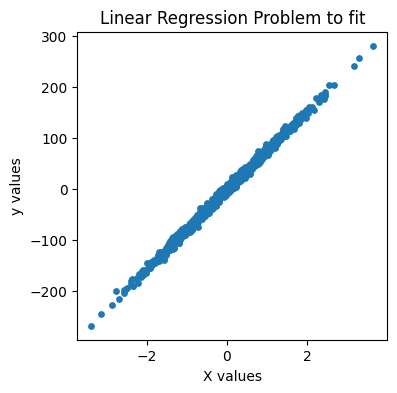

In [ ]:
# Presenting generated data
plt.figure(figsize=(4,4))
plt.scatter(X, y, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

In [ ]:
# other examples
# from sklearn import datasets
# X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
# fig = plt.figure(figsize=(8,6))
# plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
# plt.show()

# Sklearn

In [ ]:
#not yet normalised
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X, y)

LinearRegression()

In [ ]:
# Trained weights of Linear Model - w0 + w1 * x
print("Weights: " + str(linear_regression.intercept_) + str(linear_regression.coef_))

# Error - Mean Squared Errors
print("Minimized error value: " + str(np.mean((linear_regression.predict(X) - y) ** 2)))

Weights: [-1.82850328][[77.70101633]]
Minimized error value: 25.80113361508464


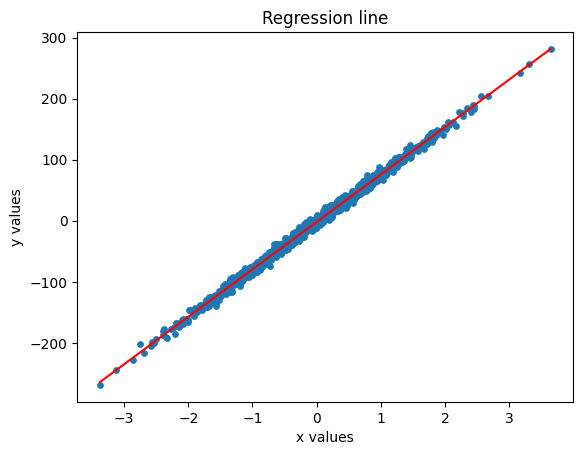

In [ ]:
# Displaying dataset
plt.scatter(X, y, s=15)

# Displaying aproximated function

#x values for red
function_x = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)
#red line
plt.plot(function_x, linear_regression.predict(function_x), c="red")
# plt.scatter(X, linear_regression.predict(X), s=20, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()

## Evaluating

In [114]:
# Want to use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#on trainig data
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print(reg.intercept_, reg.coef_)

[-1.87176813] [[77.92319905]]


In [118]:
#you do it on test
print(reg.score(X_test,y_test))
# 0.9957560649988668 close to 1 so good.

0.9957560649988668


In [115]:
#use model to predict what the y_test then compare
predictions = reg.predict(X_test)
#mean square to evaluate
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)
mse = mse(y_test, predictions)
print(mse) #lower the beter

26.425454482576036


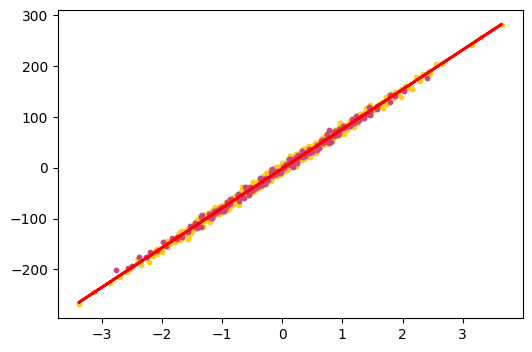

In [112]:
#We overlay the training and test data.
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('plasma')
fig = plt.figure(figsize=(6,4))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Prediction')
plt.show()

# Raw

In [ ]:
# This is slower than other tools.

In [37]:
class LinearRegression:
    """Linear Regression model.
    
    Arguments:
    ---------
    iterations: int
        Number of Gradient Descent Steps that will be performed in order to change weights of
        linear model
    learning_rate: float
        Weight applied for Gradient Descent Step during updating weights. (default: 0.001)
    normalize: boolean
        Flag for normalization. If set to true data will be scaled to values which mean is close
        to 0 and standard deviation close to 1. 
    verbose: boolean
        Flag for debugging. If set to true then error values achieved by model during training
        cycle will be displayed.
    """
    def __init__(self, iterations, learning_rate=0.001, normalize=False, 
                 verbose=False):
        self.w = None
        self._normalize_mean = None
        self._normalize_std = None
        
        self.error_history = list()
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.normalize = normalize
        self.verbose = verbose
        
    def fit(self, X, y):
        """Function that is adjusting Linear Regression Model weights 'w' to inserted data 'X'
        according to target values 'y'."""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        y = y.astype(np.float32)
        
        if self.normalize:
            # Scaling X values
            self._normalize_mean = X.mean()
            self._normalize_std = X.std()
            X = self._normalize(X)
        
        # Insert 1 values in first row of data for bias
        X = np.insert(X, 0, 1, axis=1)
        
        # Creating weight for each feature in dataset
        self.w = np.zeros((X.shape[1], 1))
        
        # Updating weights by Gradient Descent
        for i in range(self.iterations):
            
            # Gradient step - Calculating gradient
            pred = np.dot(X, self.w)
            gradient = (1 / len(X)) * (np.dot(X.T, pred - y))
            
            # Gradient step - Updating weights
            self.w = self.w - self.learning_rate * gradient
            
            # Calculating error for new weights
            error = self._mse(X, y)
            self.error_history.append(error)
            
            # Displaying learning progress every 100 iterations
            if self.verbose and i % 100 == 0:
                print("Iteration no. " + str(i) + ", error: " + str(error))
    
    def _normalize(self, X):
        """Feature scaling for input matrix 'X' for avoiding gradient overflow."""
        return (X - self._normalize_mean) / self._normalize_std
        
    def _mse(self, X, y):
        """Implementation of Mean Squared Errors - cost function for monitoring how Polynomial Model
        is performing with current 'w' values"""
        
        # Calculating Mean Squared Error
        pred = np.dot(X, self.w)
        mean_square_error = (1 / (2 * len(X))) * np.sum(np.square(pred - y))
        
        return mean_square_error
    
    def predict(self, X):
        """Function that takes feature values 'X' and returns predictions with usage of 
        current 'w' values"""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        
        if self.normalize:
            # Scaling X values
            X = self._normalize(X)
        
        # Insert 1 values in first row of data for bias
        X = np.insert(X, 0, 1, axis=1)
        pred = np.dot(X, self.w)
        return pred
        

In [60]:
iterations500 = 500
linear_regression_model500 = LinearRegression(iterations500, normalize=True, verbose=True)
linear_regression_model500.fit(X, y)

iterations1000 = 1000
linear_regression_model1000 = LinearRegression(iterations1000, normalize=True, verbose=True)
linear_regression_model1000.fit(X, y)

iterations2000 = 2000
linear_regression_model2000 = LinearRegression(iterations2000, normalize=True, verbose=True)
linear_regression_model2000.fit(X, y)

iterations5000 = 5000
linear_regression_model5000 = LinearRegression(iterations5000, normalize=True, verbose=True)
linear_regression_model5000.fit(X, y)

Iteration no. 0, error: 3061.736519142492
Iteration no. 100, error: 2508.8265971176625
Iteration no. 200, error: 2056.1875281863
Iteration no. 300, error: 1685.635077304707
Iteration no. 400, error: 1382.2827414612082
Iteration no. 0, error: 3061.736519142492
Iteration no. 100, error: 2508.8265971176625
Iteration no. 200, error: 2056.1875281863
Iteration no. 300, error: 1685.635077304707
Iteration no. 400, error: 1382.2827414612082
Iteration no. 500, error: 1133.943702162526
Iteration no. 600, error: 930.6412345276325
Iteration no. 700, error: 764.2079042580131
Iteration no. 800, error: 627.957450700403
Iteration no. 900, error: 516.4161742951237
Iteration no. 0, error: 3061.736519142492
Iteration no. 100, error: 2508.8265971176625
Iteration no. 200, error: 2056.1875281863
Iteration no. 300, error: 1685.635077304707
Iteration no. 400, error: 1382.2827414612082
Iteration no. 500, error: 1133.943702162526
Iteration no. 600, error: 930.6412345276325
Iteration no. 700, error: 764.207904258

In [93]:
# Trained weights of Linear Model - w0 + w1 * x
# w0 y intercept w1 gradient
print(linear_regression_model5000.w[1,0])

# #
# [[-3.53204867]
#  [77.56001725]]

77.56001724767383


In [55]:
# linear_regression_model.error_history

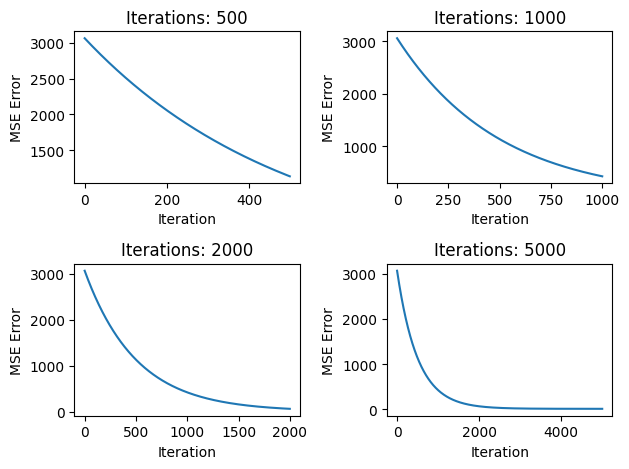

In [70]:
plt.subplot(2, 2, 1)
plt.plot(range(iterations500), linear_regression_model500.error_history)
plt.title(f"Iterations: {iterations500}")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')

plt.subplot(2, 2, 2)
plt.plot(range(iterations1000), linear_regression_model1000.error_history)
plt.title(f"Iterations: {iterations1000}")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')

plt.subplot(2, 2, 3)
plt.plot(range(iterations2000), linear_regression_model2000.error_history)
plt.title(f"Iterations: {iterations2000}")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')

plt.subplot(2, 2, 4)
plt.plot(range(iterations5000), linear_regression_model5000.error_history)
plt.title(f"Iterations: {iterations5000}")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


77.56001724767383


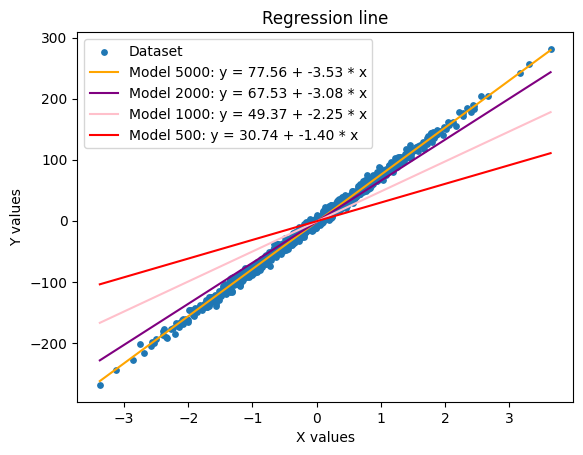

In [95]:
# Displaying dataset
plt.scatter(X, y, s=15, label="Dataset")

# Displaying approximated functions
function_x = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)

# Convert coefficients to regular Python floats for formatting
w5000 = linear_regression_model5000.w
w1000 = linear_regression_model1000.w
w2000 = linear_regression_model2000.w
w500 = linear_regression_model500.w

print(linear_regression_model5000.w[1,0])

label_5000 = f"Model 5000: y = {w5000[1, 0]:.2f} + {w5000[0, 0]:.2f} * x"
label_1000 = f"Model 1000: y = {w1000[1, 0]:.2f} + {w1000[0, 0]:.2f} * x"
label_2000 = f"Model 2000: y = {w2000[1, 0]:.2f} + {w2000[0, 0]:.2f} * x"
label_500 = f"Model 500: y = {w500[1, 0]:.2f} + {w500[0, 0]:.2f} * x"

plt.plot(function_x, linear_regression_model5000.predict(function_x), c="orange", label=label_5000)
plt.plot(function_x, linear_regression_model2000.predict(function_x), c="purple", label=label_2000)
plt.plot(function_x, linear_regression_model1000.predict(function_x), c="pink", label=label_1000)
plt.plot(function_x, linear_regression_model500.predict(function_x), c="red", label=label_500)

plt.legend()
plt.title("Regression line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()



# Tensorflow


In [2]:
import tensorflow as tf

In [ ]:

# Manual